In [1]:
import river
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
from river import datasets
from river import compose
from river import preprocessing
from river import naive_bayes
from river import drift
from river import metrics

In [3]:
# Load the Electricity Market dataset
dataset = datasets.Elec2()

# Define a model
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    naive_bayes.GaussianNB()
)

In [17]:
dataset

Electricity prices in New South Wales.

This is a binary classification task, where the goal is to predict if the price of electricity
will go up or down.

This data was collected from the Australian New South Wales Electricity Market. In this market,
prices are not fixed and are affected by demand and supply of the market. They are set every
five minutes. Electricity transfers to/from the neighboring state of Victoria were done to
alleviate fluctuations.

      Name  Elec2                                                      
      Task  Binary classification                                      
   Samples  45,312                                                     
  Features  8                                                          
    Sparse  False                                                      
      Path  C:\Users\User\river_data\Elec2\electricity.csv             
       URL  https://maxhalford.github.io/files/datasets/electricity.zip
      Size  2.95 MB                

In [4]:
# Initialize the drift detector
drift_detector = drift.ADWIN()

# Initialize a metric
metric = metrics.Accuracy()

In [5]:
# Lists to store values for plotting
instances = []
accuracies = []
drift_points = []
predictions = []

In [18]:
# Process and evaluate the stream
for i, (x, y) in enumerate(dataset.take(20000)):  # Take first 50,000 instances for demonstration
    
    # Make a prediction
    y_pred = model.predict_one(x)
    if y_pred is not None:
        predictions.append(y_pred)

    # Update the model
    model.learn_one(x, y)

    # Update the metric
    metric = metric.update(y, y_pred)

    # Store values for plotting
    instances.append(i)
    accuracies.append(metric.get())

    # Check for drift
    if drift_detector.update(y_pred != y):
        print(f"Drift detected at instance {i}")
        drift_points.append(i)
        # Resetting the model is optional
#         model = river.compose.Pipeline(
#             river.preprocessing.StandardScaler(),
#             river.naive_bayes.GaussianNB()
#         )



Drift detected at instance 0
Drift detected at instance 1
Drift detected at instance 2
Drift detected at instance 3
Drift detected at instance 4
Drift detected at instance 5
Drift detected at instance 6
Drift detected at instance 7
Drift detected at instance 8
Drift detected at instance 9
Drift detected at instance 10
Drift detected at instance 11
Drift detected at instance 12
Drift detected at instance 13
Drift detected at instance 14
Drift detected at instance 15
Drift detected at instance 16
Drift detected at instance 17
Drift detected at instance 18
Drift detected at instance 19
Drift detected at instance 20
Drift detected at instance 21
Drift detected at instance 22
Drift detected at instance 23
Drift detected at instance 24
Drift detected at instance 25
Drift detected at instance 26
Drift detected at instance 27
Drift detected at instance 28
Drift detected at instance 29
Drift detected at instance 30
Drift detected at instance 31
Drift detected at instance 32
Drift detected at in

Drift detected at instance 396
Drift detected at instance 397
Drift detected at instance 398
Drift detected at instance 399
Drift detected at instance 400
Drift detected at instance 401
Drift detected at instance 402
Drift detected at instance 403
Drift detected at instance 404
Drift detected at instance 405
Drift detected at instance 406
Drift detected at instance 407
Drift detected at instance 408
Drift detected at instance 409
Drift detected at instance 410
Drift detected at instance 411
Drift detected at instance 412
Drift detected at instance 413
Drift detected at instance 414
Drift detected at instance 415
Drift detected at instance 416
Drift detected at instance 417
Drift detected at instance 418
Drift detected at instance 419
Drift detected at instance 420
Drift detected at instance 421
Drift detected at instance 422
Drift detected at instance 423
Drift detected at instance 424
Drift detected at instance 425
Drift detected at instance 426
Drift detected at instance 427
Drift de

Drift detected at instance 676
Drift detected at instance 677
Drift detected at instance 678
Drift detected at instance 679
Drift detected at instance 680
Drift detected at instance 681
Drift detected at instance 682
Drift detected at instance 683
Drift detected at instance 684
Drift detected at instance 685
Drift detected at instance 686
Drift detected at instance 687
Drift detected at instance 688
Drift detected at instance 689
Drift detected at instance 690
Drift detected at instance 691
Drift detected at instance 692
Drift detected at instance 693
Drift detected at instance 694
Drift detected at instance 695
Drift detected at instance 696
Drift detected at instance 697
Drift detected at instance 698
Drift detected at instance 699
Drift detected at instance 700
Drift detected at instance 701
Drift detected at instance 702
Drift detected at instance 703
Drift detected at instance 704
Drift detected at instance 705
Drift detected at instance 706
Drift detected at instance 707
Drift de

Drift detected at instance 943
Drift detected at instance 944
Drift detected at instance 945
Drift detected at instance 946
Drift detected at instance 947
Drift detected at instance 948
Drift detected at instance 949
Drift detected at instance 950
Drift detected at instance 951
Drift detected at instance 952
Drift detected at instance 953
Drift detected at instance 954
Drift detected at instance 955
Drift detected at instance 956
Drift detected at instance 957
Drift detected at instance 958
Drift detected at instance 959
Drift detected at instance 960
Drift detected at instance 961
Drift detected at instance 962
Drift detected at instance 963
Drift detected at instance 964
Drift detected at instance 965
Drift detected at instance 966
Drift detected at instance 967
Drift detected at instance 968
Drift detected at instance 969
Drift detected at instance 970
Drift detected at instance 971
Drift detected at instance 972
Drift detected at instance 973
Drift detected at instance 974
Drift de

Drift detected at instance 1209
Drift detected at instance 1210
Drift detected at instance 1211
Drift detected at instance 1212
Drift detected at instance 1213
Drift detected at instance 1214
Drift detected at instance 1215
Drift detected at instance 1216
Drift detected at instance 1217
Drift detected at instance 1218
Drift detected at instance 1219
Drift detected at instance 1220
Drift detected at instance 1221
Drift detected at instance 1222
Drift detected at instance 1223
Drift detected at instance 1224
Drift detected at instance 1225
Drift detected at instance 1226
Drift detected at instance 1227
Drift detected at instance 1228
Drift detected at instance 1229
Drift detected at instance 1230
Drift detected at instance 1231
Drift detected at instance 1232
Drift detected at instance 1233
Drift detected at instance 1234
Drift detected at instance 1235
Drift detected at instance 1236
Drift detected at instance 1237
Drift detected at instance 1238
Drift detected at instance 1239
Drift de

Drift detected at instance 1576
Drift detected at instance 1577
Drift detected at instance 1578
Drift detected at instance 1579
Drift detected at instance 1580
Drift detected at instance 1581
Drift detected at instance 1582
Drift detected at instance 1583
Drift detected at instance 1584
Drift detected at instance 1585
Drift detected at instance 1586
Drift detected at instance 1587
Drift detected at instance 1588
Drift detected at instance 1589
Drift detected at instance 1590
Drift detected at instance 1591
Drift detected at instance 1592
Drift detected at instance 1593
Drift detected at instance 1594
Drift detected at instance 1595
Drift detected at instance 1596
Drift detected at instance 1597
Drift detected at instance 1598
Drift detected at instance 1599
Drift detected at instance 1600
Drift detected at instance 1601
Drift detected at instance 1602
Drift detected at instance 1603
Drift detected at instance 1604
Drift detected at instance 1605
Drift detected at instance 1606
Drift de

Drift detected at instance 1915
Drift detected at instance 1916
Drift detected at instance 1917
Drift detected at instance 1918
Drift detected at instance 1919
Drift detected at instance 1920
Drift detected at instance 1921
Drift detected at instance 1922
Drift detected at instance 1923
Drift detected at instance 1924
Drift detected at instance 1925
Drift detected at instance 1926
Drift detected at instance 1927
Drift detected at instance 1928
Drift detected at instance 1929
Drift detected at instance 1930
Drift detected at instance 1931
Drift detected at instance 1932
Drift detected at instance 1933
Drift detected at instance 1934
Drift detected at instance 1935
Drift detected at instance 1936
Drift detected at instance 1937
Drift detected at instance 1938
Drift detected at instance 1939
Drift detected at instance 1940
Drift detected at instance 1941
Drift detected at instance 1942
Drift detected at instance 1943
Drift detected at instance 1944
Drift detected at instance 1945
Drift de

Drift detected at instance 2376
Drift detected at instance 2377
Drift detected at instance 2378
Drift detected at instance 2379
Drift detected at instance 2380
Drift detected at instance 2381
Drift detected at instance 2382
Drift detected at instance 2383
Drift detected at instance 2384
Drift detected at instance 2385
Drift detected at instance 2386
Drift detected at instance 2387
Drift detected at instance 2388
Drift detected at instance 2389
Drift detected at instance 2390
Drift detected at instance 2391
Drift detected at instance 2392
Drift detected at instance 2393
Drift detected at instance 2394
Drift detected at instance 2395
Drift detected at instance 2396
Drift detected at instance 2397
Drift detected at instance 2398
Drift detected at instance 2399
Drift detected at instance 2400
Drift detected at instance 2401
Drift detected at instance 2402
Drift detected at instance 2403
Drift detected at instance 2404
Drift detected at instance 2405
Drift detected at instance 2406
Drift de

Drift detected at instance 2633
Drift detected at instance 2634
Drift detected at instance 2635
Drift detected at instance 2636
Drift detected at instance 2637
Drift detected at instance 2638
Drift detected at instance 2639
Drift detected at instance 2640
Drift detected at instance 2641
Drift detected at instance 2642
Drift detected at instance 2643
Drift detected at instance 2644
Drift detected at instance 2645
Drift detected at instance 2646
Drift detected at instance 2647
Drift detected at instance 2648
Drift detected at instance 2649
Drift detected at instance 2650
Drift detected at instance 2651
Drift detected at instance 2652
Drift detected at instance 2653
Drift detected at instance 2654
Drift detected at instance 2655
Drift detected at instance 2656
Drift detected at instance 2657
Drift detected at instance 2658
Drift detected at instance 2659
Drift detected at instance 2660
Drift detected at instance 2661
Drift detected at instance 2662
Drift detected at instance 2663
Drift de

Drift detected at instance 3066
Drift detected at instance 3067
Drift detected at instance 3068
Drift detected at instance 3069
Drift detected at instance 3070
Drift detected at instance 3071
Drift detected at instance 3072
Drift detected at instance 3073
Drift detected at instance 3074
Drift detected at instance 3075
Drift detected at instance 3076
Drift detected at instance 3077
Drift detected at instance 3078
Drift detected at instance 3079
Drift detected at instance 3080
Drift detected at instance 3081
Drift detected at instance 3082
Drift detected at instance 3083
Drift detected at instance 3084
Drift detected at instance 3085
Drift detected at instance 3086
Drift detected at instance 3087
Drift detected at instance 3088
Drift detected at instance 3089
Drift detected at instance 3090
Drift detected at instance 3091
Drift detected at instance 3092
Drift detected at instance 3093
Drift detected at instance 3094
Drift detected at instance 3095
Drift detected at instance 3096
Drift de

Drift detected at instance 3344
Drift detected at instance 3345
Drift detected at instance 3346
Drift detected at instance 3347
Drift detected at instance 3348
Drift detected at instance 3349
Drift detected at instance 3350
Drift detected at instance 3351
Drift detected at instance 3352
Drift detected at instance 3353
Drift detected at instance 3354
Drift detected at instance 3355
Drift detected at instance 3356
Drift detected at instance 3357
Drift detected at instance 3358
Drift detected at instance 3359
Drift detected at instance 3360
Drift detected at instance 3361
Drift detected at instance 3362
Drift detected at instance 3363
Drift detected at instance 3364
Drift detected at instance 3365
Drift detected at instance 3366
Drift detected at instance 3367
Drift detected at instance 3368
Drift detected at instance 3369
Drift detected at instance 3370
Drift detected at instance 3371
Drift detected at instance 3372
Drift detected at instance 3373
Drift detected at instance 3374
Drift de

Drift detected at instance 3947
Drift detected at instance 3948
Drift detected at instance 3949
Drift detected at instance 3950
Drift detected at instance 3951
Drift detected at instance 3952
Drift detected at instance 3953
Drift detected at instance 3954
Drift detected at instance 3955
Drift detected at instance 3956
Drift detected at instance 3957
Drift detected at instance 3958
Drift detected at instance 3959
Drift detected at instance 3960
Drift detected at instance 3961
Drift detected at instance 3962
Drift detected at instance 3963
Drift detected at instance 3964
Drift detected at instance 3965
Drift detected at instance 3966
Drift detected at instance 3967
Drift detected at instance 3968
Drift detected at instance 3969
Drift detected at instance 3970
Drift detected at instance 3971
Drift detected at instance 3972
Drift detected at instance 3973
Drift detected at instance 3974
Drift detected at instance 3975
Drift detected at instance 3976
Drift detected at instance 3977
Drift de

Drift detected at instance 4303
Drift detected at instance 4304
Drift detected at instance 4305
Drift detected at instance 4306
Drift detected at instance 4307
Drift detected at instance 4308
Drift detected at instance 4309
Drift detected at instance 4310
Drift detected at instance 4311
Drift detected at instance 4312
Drift detected at instance 4313
Drift detected at instance 4314
Drift detected at instance 4315
Drift detected at instance 4316
Drift detected at instance 4317
Drift detected at instance 4318
Drift detected at instance 4319
Drift detected at instance 4320
Drift detected at instance 4321
Drift detected at instance 4322
Drift detected at instance 4323
Drift detected at instance 4324
Drift detected at instance 4325
Drift detected at instance 4326
Drift detected at instance 4327
Drift detected at instance 4328
Drift detected at instance 4329
Drift detected at instance 4330
Drift detected at instance 4331
Drift detected at instance 4332
Drift detected at instance 4333
Drift de

Drift detected at instance 5089
Drift detected at instance 5090
Drift detected at instance 5091
Drift detected at instance 5092
Drift detected at instance 5093
Drift detected at instance 5094
Drift detected at instance 5095
Drift detected at instance 5096
Drift detected at instance 5097
Drift detected at instance 5098
Drift detected at instance 5099
Drift detected at instance 5100
Drift detected at instance 5101
Drift detected at instance 5102
Drift detected at instance 5103
Drift detected at instance 5104
Drift detected at instance 5105
Drift detected at instance 5106
Drift detected at instance 5107
Drift detected at instance 5108
Drift detected at instance 5109
Drift detected at instance 5110
Drift detected at instance 5111
Drift detected at instance 5112
Drift detected at instance 5113
Drift detected at instance 5114
Drift detected at instance 5115
Drift detected at instance 5116
Drift detected at instance 5117
Drift detected at instance 5118
Drift detected at instance 5119
Drift de

Drift detected at instance 5446
Drift detected at instance 5447
Drift detected at instance 5448
Drift detected at instance 5449
Drift detected at instance 5450
Drift detected at instance 5451
Drift detected at instance 5452
Drift detected at instance 5453
Drift detected at instance 5454
Drift detected at instance 5455
Drift detected at instance 5456
Drift detected at instance 5457
Drift detected at instance 5458
Drift detected at instance 5459
Drift detected at instance 5460
Drift detected at instance 5461
Drift detected at instance 5462
Drift detected at instance 5463
Drift detected at instance 5464
Drift detected at instance 5465
Drift detected at instance 5466
Drift detected at instance 5467
Drift detected at instance 5468
Drift detected at instance 5469
Drift detected at instance 5470
Drift detected at instance 5471
Drift detected at instance 5472
Drift detected at instance 5473
Drift detected at instance 5474
Drift detected at instance 5475
Drift detected at instance 5476
Drift de

Drift detected at instance 5858
Drift detected at instance 5859
Drift detected at instance 5860
Drift detected at instance 5861
Drift detected at instance 5862
Drift detected at instance 5863
Drift detected at instance 5864
Drift detected at instance 5865
Drift detected at instance 5866
Drift detected at instance 5867
Drift detected at instance 5868
Drift detected at instance 5869
Drift detected at instance 5870
Drift detected at instance 5871
Drift detected at instance 5872
Drift detected at instance 5873
Drift detected at instance 5874
Drift detected at instance 5875
Drift detected at instance 5876
Drift detected at instance 5877
Drift detected at instance 5878
Drift detected at instance 5879
Drift detected at instance 5880
Drift detected at instance 5881
Drift detected at instance 5882
Drift detected at instance 5883
Drift detected at instance 5884
Drift detected at instance 5885
Drift detected at instance 5886
Drift detected at instance 5887
Drift detected at instance 5888
Drift de

Drift detected at instance 6187
Drift detected at instance 6188
Drift detected at instance 6189
Drift detected at instance 6190
Drift detected at instance 6191
Drift detected at instance 6192
Drift detected at instance 6193
Drift detected at instance 6194
Drift detected at instance 6195
Drift detected at instance 6196
Drift detected at instance 6197
Drift detected at instance 6198
Drift detected at instance 6199
Drift detected at instance 6200
Drift detected at instance 6201
Drift detected at instance 6202
Drift detected at instance 6203
Drift detected at instance 6204
Drift detected at instance 6205
Drift detected at instance 6206
Drift detected at instance 6207
Drift detected at instance 6208
Drift detected at instance 6209
Drift detected at instance 6210
Drift detected at instance 6211
Drift detected at instance 6212
Drift detected at instance 6213
Drift detected at instance 6214
Drift detected at instance 6215
Drift detected at instance 6216
Drift detected at instance 6217
Drift de

Drift detected at instance 6575
Drift detected at instance 6576
Drift detected at instance 6577
Drift detected at instance 6578
Drift detected at instance 6579
Drift detected at instance 6580
Drift detected at instance 6581
Drift detected at instance 6582
Drift detected at instance 6583
Drift detected at instance 6584
Drift detected at instance 6585
Drift detected at instance 6586
Drift detected at instance 6587
Drift detected at instance 6588
Drift detected at instance 6589
Drift detected at instance 6590
Drift detected at instance 6591
Drift detected at instance 6592
Drift detected at instance 6593
Drift detected at instance 6594
Drift detected at instance 6595
Drift detected at instance 6596
Drift detected at instance 6597
Drift detected at instance 6598
Drift detected at instance 6599
Drift detected at instance 6600
Drift detected at instance 6601
Drift detected at instance 6602
Drift detected at instance 6603
Drift detected at instance 6604
Drift detected at instance 6605
Drift de

Drift detected at instance 7532
Drift detected at instance 7533
Drift detected at instance 7534
Drift detected at instance 7535
Drift detected at instance 7536
Drift detected at instance 7537
Drift detected at instance 7538
Drift detected at instance 7539
Drift detected at instance 7540
Drift detected at instance 7541
Drift detected at instance 7542
Drift detected at instance 7543
Drift detected at instance 7544
Drift detected at instance 7545
Drift detected at instance 7546
Drift detected at instance 7547
Drift detected at instance 7548
Drift detected at instance 7549
Drift detected at instance 7550
Drift detected at instance 7551
Drift detected at instance 7552
Drift detected at instance 7553
Drift detected at instance 7554
Drift detected at instance 7555
Drift detected at instance 7556
Drift detected at instance 7557
Drift detected at instance 7558
Drift detected at instance 7559
Drift detected at instance 7560
Drift detected at instance 7561
Drift detected at instance 7562
Drift de

Drift detected at instance 8210
Drift detected at instance 8211
Drift detected at instance 8212
Drift detected at instance 8213
Drift detected at instance 8214
Drift detected at instance 8215
Drift detected at instance 8216
Drift detected at instance 8217
Drift detected at instance 8218
Drift detected at instance 8219
Drift detected at instance 8220
Drift detected at instance 8221
Drift detected at instance 8222
Drift detected at instance 8223
Drift detected at instance 8224
Drift detected at instance 8225
Drift detected at instance 8226
Drift detected at instance 8227
Drift detected at instance 8228
Drift detected at instance 8229
Drift detected at instance 8230
Drift detected at instance 8231
Drift detected at instance 8232
Drift detected at instance 8233
Drift detected at instance 8234
Drift detected at instance 8235
Drift detected at instance 8236
Drift detected at instance 8237
Drift detected at instance 8238
Drift detected at instance 8239
Drift detected at instance 8240
Drift de

Drift detected at instance 8492
Drift detected at instance 8493
Drift detected at instance 8494
Drift detected at instance 8495
Drift detected at instance 8496
Drift detected at instance 8497
Drift detected at instance 8498
Drift detected at instance 8499
Drift detected at instance 8500
Drift detected at instance 8501
Drift detected at instance 8502
Drift detected at instance 8503
Drift detected at instance 8504
Drift detected at instance 8505
Drift detected at instance 8506
Drift detected at instance 8507
Drift detected at instance 8508
Drift detected at instance 8509
Drift detected at instance 8510
Drift detected at instance 8511
Drift detected at instance 8512
Drift detected at instance 8513
Drift detected at instance 8514
Drift detected at instance 8515
Drift detected at instance 8516
Drift detected at instance 8517
Drift detected at instance 8518
Drift detected at instance 8519
Drift detected at instance 8520
Drift detected at instance 8521
Drift detected at instance 8522
Drift de

Drift detected at instance 9212
Drift detected at instance 9213
Drift detected at instance 9214
Drift detected at instance 9215
Drift detected at instance 9216
Drift detected at instance 9217
Drift detected at instance 9218
Drift detected at instance 9219
Drift detected at instance 9220
Drift detected at instance 9221
Drift detected at instance 9222
Drift detected at instance 9223
Drift detected at instance 9224
Drift detected at instance 9225
Drift detected at instance 9226
Drift detected at instance 9227
Drift detected at instance 9228
Drift detected at instance 9229
Drift detected at instance 9230
Drift detected at instance 9231
Drift detected at instance 9232
Drift detected at instance 9233
Drift detected at instance 9234
Drift detected at instance 9235
Drift detected at instance 9236
Drift detected at instance 9237
Drift detected at instance 9238
Drift detected at instance 9239
Drift detected at instance 9240
Drift detected at instance 9241
Drift detected at instance 9242
Drift de

Drift detected at instance 9538
Drift detected at instance 9539
Drift detected at instance 9540
Drift detected at instance 9541
Drift detected at instance 9542
Drift detected at instance 9543
Drift detected at instance 9544
Drift detected at instance 9545
Drift detected at instance 9546
Drift detected at instance 9547
Drift detected at instance 9548
Drift detected at instance 9549
Drift detected at instance 9550
Drift detected at instance 9551
Drift detected at instance 9552
Drift detected at instance 9553
Drift detected at instance 9554
Drift detected at instance 9555
Drift detected at instance 9556
Drift detected at instance 9557
Drift detected at instance 9558
Drift detected at instance 9559
Drift detected at instance 9560
Drift detected at instance 9561
Drift detected at instance 9562
Drift detected at instance 9563
Drift detected at instance 9564
Drift detected at instance 9565
Drift detected at instance 9566
Drift detected at instance 9567
Drift detected at instance 9568
Drift de

Drift detected at instance 9932
Drift detected at instance 9933
Drift detected at instance 9934
Drift detected at instance 9935
Drift detected at instance 9936
Drift detected at instance 9937
Drift detected at instance 9938
Drift detected at instance 9939
Drift detected at instance 9940
Drift detected at instance 9941
Drift detected at instance 9942
Drift detected at instance 9943
Drift detected at instance 9944
Drift detected at instance 9945
Drift detected at instance 9946
Drift detected at instance 9947
Drift detected at instance 9948
Drift detected at instance 9949
Drift detected at instance 9950
Drift detected at instance 9951
Drift detected at instance 9952
Drift detected at instance 9953
Drift detected at instance 9954
Drift detected at instance 9955
Drift detected at instance 9956
Drift detected at instance 9957
Drift detected at instance 9958
Drift detected at instance 9959
Drift detected at instance 9960
Drift detected at instance 9961
Drift detected at instance 9962
Drift de

Drift detected at instance 10340
Drift detected at instance 10341
Drift detected at instance 10342
Drift detected at instance 10343
Drift detected at instance 10344
Drift detected at instance 10345
Drift detected at instance 10346
Drift detected at instance 10347
Drift detected at instance 10348
Drift detected at instance 10349
Drift detected at instance 10350
Drift detected at instance 10351
Drift detected at instance 10352
Drift detected at instance 10353
Drift detected at instance 10354
Drift detected at instance 10355
Drift detected at instance 10356
Drift detected at instance 10357
Drift detected at instance 10358
Drift detected at instance 10359
Drift detected at instance 10360
Drift detected at instance 10361
Drift detected at instance 10362
Drift detected at instance 10363
Drift detected at instance 10364
Drift detected at instance 10365
Drift detected at instance 10366
Drift detected at instance 10367
Drift detected at instance 10368
Drift detected at instance 10369
Drift dete

Drift detected at instance 10769
Drift detected at instance 10770
Drift detected at instance 10771
Drift detected at instance 10772
Drift detected at instance 10773
Drift detected at instance 10774
Drift detected at instance 10775
Drift detected at instance 10776
Drift detected at instance 10777
Drift detected at instance 10778
Drift detected at instance 10779
Drift detected at instance 10780
Drift detected at instance 10781
Drift detected at instance 10782
Drift detected at instance 10783
Drift detected at instance 10784
Drift detected at instance 10785
Drift detected at instance 10786
Drift detected at instance 10787
Drift detected at instance 10788
Drift detected at instance 10789
Drift detected at instance 10790
Drift detected at instance 10791
Drift detected at instance 10792
Drift detected at instance 10793
Drift detected at instance 10794
Drift detected at instance 10795
Drift detected at instance 10796
Drift detected at instance 10797
Drift detected at instance 10798
Drift dete

Drift detected at instance 11130
Drift detected at instance 11131
Drift detected at instance 11132
Drift detected at instance 11133
Drift detected at instance 11134
Drift detected at instance 11135
Drift detected at instance 11136
Drift detected at instance 11137
Drift detected at instance 11138
Drift detected at instance 11139
Drift detected at instance 11140
Drift detected at instance 11141
Drift detected at instance 11142
Drift detected at instance 11143
Drift detected at instance 11144
Drift detected at instance 11145
Drift detected at instance 11146
Drift detected at instance 11147
Drift detected at instance 11148
Drift detected at instance 11149
Drift detected at instance 11150
Drift detected at instance 11151
Drift detected at instance 11152
Drift detected at instance 11153
Drift detected at instance 11154
Drift detected at instance 11155
Drift detected at instance 11156
Drift detected at instance 11157
Drift detected at instance 11158
Drift detected at instance 11159
Drift dete

Drift detected at instance 11522
Drift detected at instance 11523
Drift detected at instance 11524
Drift detected at instance 11525
Drift detected at instance 11526
Drift detected at instance 11527
Drift detected at instance 11528
Drift detected at instance 11529
Drift detected at instance 11530
Drift detected at instance 11531
Drift detected at instance 11532
Drift detected at instance 11533
Drift detected at instance 11534
Drift detected at instance 11535
Drift detected at instance 11536
Drift detected at instance 11537
Drift detected at instance 11538
Drift detected at instance 11539
Drift detected at instance 11540
Drift detected at instance 11541
Drift detected at instance 11542
Drift detected at instance 11543
Drift detected at instance 11544
Drift detected at instance 11545
Drift detected at instance 11546
Drift detected at instance 11547
Drift detected at instance 11548
Drift detected at instance 11549
Drift detected at instance 11550
Drift detected at instance 11551
Drift dete

Drift detected at instance 11933
Drift detected at instance 11934
Drift detected at instance 11935
Drift detected at instance 11936
Drift detected at instance 11937
Drift detected at instance 11938
Drift detected at instance 11939
Drift detected at instance 11940
Drift detected at instance 11941
Drift detected at instance 11942
Drift detected at instance 11943
Drift detected at instance 11944
Drift detected at instance 11945
Drift detected at instance 11946
Drift detected at instance 11947
Drift detected at instance 11948
Drift detected at instance 11949
Drift detected at instance 11950
Drift detected at instance 11951
Drift detected at instance 11952
Drift detected at instance 11953
Drift detected at instance 11954
Drift detected at instance 11955
Drift detected at instance 11956
Drift detected at instance 11957
Drift detected at instance 11958
Drift detected at instance 11959
Drift detected at instance 11960
Drift detected at instance 11961
Drift detected at instance 11962
Drift dete

Drift detected at instance 12327
Drift detected at instance 12328
Drift detected at instance 12329
Drift detected at instance 12330
Drift detected at instance 12331
Drift detected at instance 12332
Drift detected at instance 12333
Drift detected at instance 12334
Drift detected at instance 12335
Drift detected at instance 12336
Drift detected at instance 12337
Drift detected at instance 12338
Drift detected at instance 12339
Drift detected at instance 12340
Drift detected at instance 12341
Drift detected at instance 12342
Drift detected at instance 12343
Drift detected at instance 12344
Drift detected at instance 12345
Drift detected at instance 12346
Drift detected at instance 12347
Drift detected at instance 12348
Drift detected at instance 12349
Drift detected at instance 12350
Drift detected at instance 12351
Drift detected at instance 12352
Drift detected at instance 12353
Drift detected at instance 12354
Drift detected at instance 12355
Drift detected at instance 12356
Drift dete

Drift detected at instance 12685
Drift detected at instance 12686
Drift detected at instance 12687
Drift detected at instance 12688
Drift detected at instance 12689
Drift detected at instance 12690
Drift detected at instance 12691
Drift detected at instance 12692
Drift detected at instance 12693
Drift detected at instance 12694
Drift detected at instance 12695
Drift detected at instance 12696
Drift detected at instance 12697
Drift detected at instance 12698
Drift detected at instance 12699
Drift detected at instance 12700
Drift detected at instance 12701
Drift detected at instance 12702
Drift detected at instance 12703
Drift detected at instance 12704
Drift detected at instance 12705
Drift detected at instance 12706
Drift detected at instance 12707
Drift detected at instance 12708
Drift detected at instance 12709
Drift detected at instance 12710
Drift detected at instance 12711
Drift detected at instance 12712
Drift detected at instance 12713
Drift detected at instance 12714
Drift dete

Drift detected at instance 13044
Drift detected at instance 13045
Drift detected at instance 13046
Drift detected at instance 13047
Drift detected at instance 13048
Drift detected at instance 13049
Drift detected at instance 13050
Drift detected at instance 13051
Drift detected at instance 13052
Drift detected at instance 13053
Drift detected at instance 13054
Drift detected at instance 13055
Drift detected at instance 13056
Drift detected at instance 13057
Drift detected at instance 13058
Drift detected at instance 13059
Drift detected at instance 13060
Drift detected at instance 13061
Drift detected at instance 13062
Drift detected at instance 13063
Drift detected at instance 13064
Drift detected at instance 13065
Drift detected at instance 13066
Drift detected at instance 13067
Drift detected at instance 13068
Drift detected at instance 13069
Drift detected at instance 13070
Drift detected at instance 13071
Drift detected at instance 13072
Drift detected at instance 13073
Drift dete

Drift detected at instance 13820
Drift detected at instance 13821
Drift detected at instance 13822
Drift detected at instance 13823
Drift detected at instance 13824
Drift detected at instance 13825
Drift detected at instance 13826
Drift detected at instance 13827
Drift detected at instance 13828
Drift detected at instance 13829
Drift detected at instance 13830
Drift detected at instance 13831
Drift detected at instance 13832
Drift detected at instance 13833
Drift detected at instance 13834
Drift detected at instance 13835
Drift detected at instance 13836
Drift detected at instance 13837
Drift detected at instance 13838
Drift detected at instance 13839
Drift detected at instance 13840
Drift detected at instance 13841
Drift detected at instance 13842
Drift detected at instance 13843
Drift detected at instance 13844
Drift detected at instance 13845
Drift detected at instance 13846
Drift detected at instance 13847
Drift detected at instance 13848
Drift detected at instance 13849
Drift dete

Drift detected at instance 14076
Drift detected at instance 14077
Drift detected at instance 14078
Drift detected at instance 14079
Drift detected at instance 14080
Drift detected at instance 14081
Drift detected at instance 14082
Drift detected at instance 14083
Drift detected at instance 14084
Drift detected at instance 14085
Drift detected at instance 14086
Drift detected at instance 14087
Drift detected at instance 14088
Drift detected at instance 14089
Drift detected at instance 14090
Drift detected at instance 14091
Drift detected at instance 14092
Drift detected at instance 14093
Drift detected at instance 14094
Drift detected at instance 14095
Drift detected at instance 14096
Drift detected at instance 14097
Drift detected at instance 14098
Drift detected at instance 14099
Drift detected at instance 14100
Drift detected at instance 14101
Drift detected at instance 14102
Drift detected at instance 14103
Drift detected at instance 14104
Drift detected at instance 14105
Drift dete

Drift detected at instance 14343
Drift detected at instance 14344
Drift detected at instance 14345
Drift detected at instance 14346
Drift detected at instance 14347
Drift detected at instance 14348
Drift detected at instance 14349
Drift detected at instance 14350
Drift detected at instance 14351
Drift detected at instance 14352
Drift detected at instance 14353
Drift detected at instance 14354
Drift detected at instance 14355
Drift detected at instance 14356
Drift detected at instance 14357
Drift detected at instance 14358
Drift detected at instance 14359
Drift detected at instance 14360
Drift detected at instance 14361
Drift detected at instance 14362
Drift detected at instance 14363
Drift detected at instance 14364
Drift detected at instance 14365
Drift detected at instance 14366
Drift detected at instance 14367
Drift detected at instance 14368
Drift detected at instance 14369
Drift detected at instance 14370
Drift detected at instance 14371
Drift detected at instance 14372
Drift dete

Drift detected at instance 14833
Drift detected at instance 14834
Drift detected at instance 14835
Drift detected at instance 14836
Drift detected at instance 14837
Drift detected at instance 14838
Drift detected at instance 14839
Drift detected at instance 14840
Drift detected at instance 14841
Drift detected at instance 14842
Drift detected at instance 14843
Drift detected at instance 14844
Drift detected at instance 14845
Drift detected at instance 14846
Drift detected at instance 14847
Drift detected at instance 14848
Drift detected at instance 14849
Drift detected at instance 14850
Drift detected at instance 14851
Drift detected at instance 14852
Drift detected at instance 14853
Drift detected at instance 14854
Drift detected at instance 14855
Drift detected at instance 14856
Drift detected at instance 14857
Drift detected at instance 14858
Drift detected at instance 14859
Drift detected at instance 14860
Drift detected at instance 14861
Drift detected at instance 14862
Drift dete

Drift detected at instance 15201
Drift detected at instance 15202
Drift detected at instance 15203
Drift detected at instance 15204
Drift detected at instance 15205
Drift detected at instance 15206
Drift detected at instance 15207
Drift detected at instance 15208
Drift detected at instance 15209
Drift detected at instance 15210
Drift detected at instance 15211
Drift detected at instance 15212
Drift detected at instance 15213
Drift detected at instance 15214
Drift detected at instance 15215
Drift detected at instance 15216
Drift detected at instance 15217
Drift detected at instance 15218
Drift detected at instance 15219
Drift detected at instance 15220
Drift detected at instance 15221
Drift detected at instance 15222
Drift detected at instance 15223
Drift detected at instance 15224
Drift detected at instance 15225
Drift detected at instance 15226
Drift detected at instance 15227
Drift detected at instance 15228
Drift detected at instance 15229
Drift detected at instance 15230
Drift dete

Drift detected at instance 15798
Drift detected at instance 15799
Drift detected at instance 15800
Drift detected at instance 15801
Drift detected at instance 15802
Drift detected at instance 15803
Drift detected at instance 15804
Drift detected at instance 15805
Drift detected at instance 15806
Drift detected at instance 15807
Drift detected at instance 15808
Drift detected at instance 15809
Drift detected at instance 15810
Drift detected at instance 15811
Drift detected at instance 15812
Drift detected at instance 15813
Drift detected at instance 15814
Drift detected at instance 15815
Drift detected at instance 15816
Drift detected at instance 15817
Drift detected at instance 15818
Drift detected at instance 15819
Drift detected at instance 15820
Drift detected at instance 15821
Drift detected at instance 15822
Drift detected at instance 15823
Drift detected at instance 15824
Drift detected at instance 15825
Drift detected at instance 15826
Drift detected at instance 15827
Drift dete

Drift detected at instance 16276
Drift detected at instance 16277
Drift detected at instance 16278
Drift detected at instance 16279
Drift detected at instance 16280
Drift detected at instance 16281
Drift detected at instance 16282
Drift detected at instance 16283
Drift detected at instance 16284
Drift detected at instance 16285
Drift detected at instance 16286
Drift detected at instance 16287
Drift detected at instance 16288
Drift detected at instance 16289
Drift detected at instance 16290
Drift detected at instance 16291
Drift detected at instance 16292
Drift detected at instance 16293
Drift detected at instance 16294
Drift detected at instance 16295
Drift detected at instance 16296
Drift detected at instance 16297
Drift detected at instance 16298
Drift detected at instance 16299
Drift detected at instance 16300
Drift detected at instance 16301
Drift detected at instance 16302
Drift detected at instance 16303
Drift detected at instance 16304
Drift detected at instance 16305
Drift dete

Drift detected at instance 16733
Drift detected at instance 16734
Drift detected at instance 16735
Drift detected at instance 16736
Drift detected at instance 16737
Drift detected at instance 16738
Drift detected at instance 16739
Drift detected at instance 16740
Drift detected at instance 16741
Drift detected at instance 16742
Drift detected at instance 16743
Drift detected at instance 16744
Drift detected at instance 16745
Drift detected at instance 16746
Drift detected at instance 16747
Drift detected at instance 16748
Drift detected at instance 16749
Drift detected at instance 16750
Drift detected at instance 16751
Drift detected at instance 16752
Drift detected at instance 16753
Drift detected at instance 16754
Drift detected at instance 16755
Drift detected at instance 16756
Drift detected at instance 16757
Drift detected at instance 16758
Drift detected at instance 16759
Drift detected at instance 16760
Drift detected at instance 16761
Drift detected at instance 16762
Drift dete

Drift detected at instance 17350
Drift detected at instance 17351
Drift detected at instance 17352
Drift detected at instance 17353
Drift detected at instance 17354
Drift detected at instance 17355
Drift detected at instance 17356
Drift detected at instance 17357
Drift detected at instance 17358
Drift detected at instance 17359
Drift detected at instance 17360
Drift detected at instance 17361
Drift detected at instance 17362
Drift detected at instance 17363
Drift detected at instance 17364
Drift detected at instance 17365
Drift detected at instance 17366
Drift detected at instance 17367
Drift detected at instance 17368
Drift detected at instance 17369
Drift detected at instance 17370
Drift detected at instance 17371
Drift detected at instance 17372
Drift detected at instance 17373
Drift detected at instance 17374
Drift detected at instance 17375
Drift detected at instance 17376
Drift detected at instance 17377
Drift detected at instance 17378
Drift detected at instance 17379
Drift dete

Drift detected at instance 18433
Drift detected at instance 18434
Drift detected at instance 18435
Drift detected at instance 18436
Drift detected at instance 18437
Drift detected at instance 18438
Drift detected at instance 18439
Drift detected at instance 18440
Drift detected at instance 18441
Drift detected at instance 18442
Drift detected at instance 18443
Drift detected at instance 18444
Drift detected at instance 18445
Drift detected at instance 18446
Drift detected at instance 18447
Drift detected at instance 18448
Drift detected at instance 18449
Drift detected at instance 18450
Drift detected at instance 18451
Drift detected at instance 18452
Drift detected at instance 18453
Drift detected at instance 18454
Drift detected at instance 18455
Drift detected at instance 18456
Drift detected at instance 18457
Drift detected at instance 18458
Drift detected at instance 18459
Drift detected at instance 18460
Drift detected at instance 18461
Drift detected at instance 18462
Drift dete

Drift detected at instance 18729
Drift detected at instance 18730
Drift detected at instance 18731
Drift detected at instance 18732
Drift detected at instance 18733
Drift detected at instance 18734
Drift detected at instance 18735
Drift detected at instance 18736
Drift detected at instance 18737
Drift detected at instance 18738
Drift detected at instance 18739
Drift detected at instance 18740
Drift detected at instance 18741
Drift detected at instance 18742
Drift detected at instance 18743
Drift detected at instance 18744
Drift detected at instance 18745
Drift detected at instance 18746
Drift detected at instance 18747
Drift detected at instance 18748
Drift detected at instance 18749
Drift detected at instance 18750
Drift detected at instance 18751
Drift detected at instance 18752
Drift detected at instance 18753
Drift detected at instance 18754
Drift detected at instance 18755
Drift detected at instance 18756
Drift detected at instance 18757
Drift detected at instance 18758
Drift dete

Drift detected at instance 19128
Drift detected at instance 19129
Drift detected at instance 19130
Drift detected at instance 19131
Drift detected at instance 19132
Drift detected at instance 19133
Drift detected at instance 19134
Drift detected at instance 19135
Drift detected at instance 19136
Drift detected at instance 19137
Drift detected at instance 19138
Drift detected at instance 19139
Drift detected at instance 19140
Drift detected at instance 19141
Drift detected at instance 19142
Drift detected at instance 19143
Drift detected at instance 19144
Drift detected at instance 19145
Drift detected at instance 19146
Drift detected at instance 19147
Drift detected at instance 19148
Drift detected at instance 19149
Drift detected at instance 19150
Drift detected at instance 19151
Drift detected at instance 19152
Drift detected at instance 19153
Drift detected at instance 19154
Drift detected at instance 19155
Drift detected at instance 19156
Drift detected at instance 19157
Drift dete

Drift detected at instance 19479
Drift detected at instance 19480
Drift detected at instance 19481
Drift detected at instance 19482
Drift detected at instance 19483
Drift detected at instance 19484
Drift detected at instance 19485
Drift detected at instance 19486
Drift detected at instance 19487
Drift detected at instance 19488
Drift detected at instance 19489
Drift detected at instance 19490
Drift detected at instance 19491
Drift detected at instance 19492
Drift detected at instance 19493
Drift detected at instance 19494
Drift detected at instance 19495
Drift detected at instance 19496
Drift detected at instance 19497
Drift detected at instance 19498
Drift detected at instance 19499
Drift detected at instance 19500
Drift detected at instance 19501
Drift detected at instance 19502
Drift detected at instance 19503
Drift detected at instance 19504
Drift detected at instance 19505
Drift detected at instance 19506
Drift detected at instance 19507
Drift detected at instance 19508
Drift dete

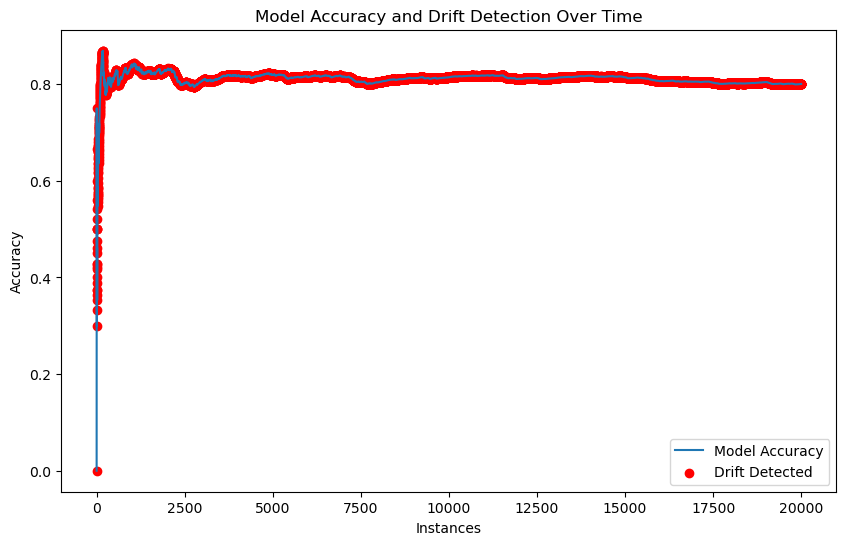

In [7]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(instances, accuracies, label='Model Accuracy')
plt.scatter(drift_points, [accuracies[i] for i in drift_points], color='red', label='Drift Detected')
plt.xlabel('Instances')
plt.ylabel('Accuracy')
plt.title('Model Accuracy and Drift Detection Over Time')
plt.legend()
plt.show()

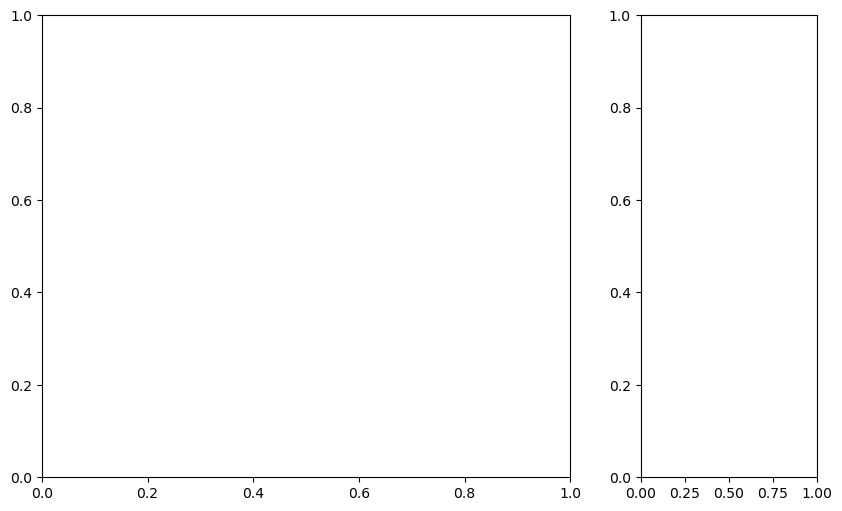

In [8]:
# Plotting
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])

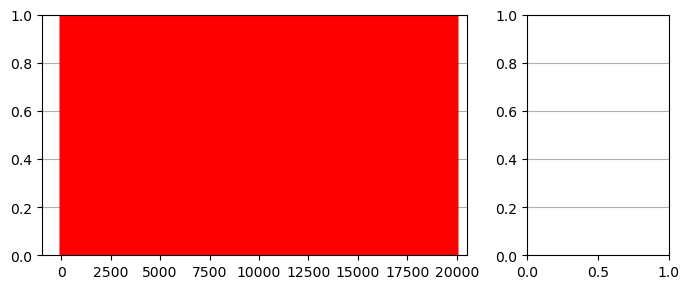

In [15]:
stream = dataset.take(20000)

fig = plt.figure(figsize=(7,3), tight_layout=True)
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
ax1.grid()
ax2.grid(axis='y')
# if drifts is not None:
for drift_detected in drift_points:
    ax1.axvline(drift_detected, color='red')
plt.show()